<a href="https://colab.research.google.com/github/JoaoDaross/NBADataWithKMeansClustering/blob/main/NBADataWithKMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Notebook to explore players from NBA 2013 and using Kmeans clustering, group them together to find out similar players**

In [4]:
# import the required dependencies to carry out the work.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
fonte = 'https://raw.githubusercontent.com/JoaoDaross/NBADataWithKMeansClustering/main/nba_2013.csv'
data = pd.read_csv(fonte) # reading the csv file
data.head() # display the top 5 records from the dataset
# visit https://en.wikipedia.org/wiki/Basketball_statistics to know more about the columns

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


In [6]:
print(data.shape) # print the shape of the dataset - 481 rows and 31 columns
data.info() #information about each column

(481, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 no

In [7]:
data.describe() #getting statistics on each column in the field

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,481.000000,481.000000,478.000000,479.000000,481.000000,481.000000,461.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,153.268191,314.332640,0.466947,0.480752,91.205821,120.642412,0.722419,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,147.223161,294.174554,0.104448,0.099552,103.667725,131.240639,0.160166,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,31.000000,67.000000,0.434719,0.451000,16.000000,22.000000,0.654000,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,110.000000,227.000000,0.474475,0.488000,53.000000,73.000000,0.751000,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,230.000000,459.000000,0.513729,0.526000,126.000000,179.000000,0.821000,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,706.000000,1408.000000,1.000000,1.000000,703.000000,805.000000,1.000000,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [8]:
data.loc[:,['fg','fga']].mean() # to find the mean of fildgoals made vs attempted

fg     192.881497
fga    424.463617
dtype: float64

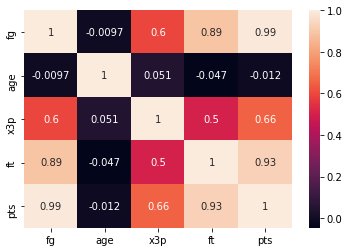

In [9]:
sns.heatmap(data[['fg','age','x3p','ft','pts']].corr(),annot= True)

Points made my a player is highly correlated to :

Field goals - 99%

Free Throws made (93%)

66% with 3 point shots

Age is not a factor when considering Points

In [10]:
# let us cluster the players using KMeans clustering method
from sklearn.cluster import KMeans
kmean_model = KMeans(n_clusters = 5,random_state = 41) #create the kmeans model with 5 clusters
num_columns = data._get_numeric_data().dropna(axis = 1) #get only numeric data from dataset and remove missing data
kmean_model.fit(num_columns) #train the model
labels = kmean_model.labels_  #get the labels
print(labels)

[0 0 0 4 0 2 4 0 3 3 3 2 3 3 1 0 3 4 2 0 1 2 0 0 1 2 0 2 2 2 3 3 1 3 2 1 3
 4 3 2 0 4 0 1 0 3 2 2 0 3 3 3 3 2 2 3 0 3 1 4 1 3 1 2 3 2 2 2 2 0 2 1 1 3
 1 2 2 0 0 0 1 3 2 1 1 4 3 1 3 1 2 2 0 2 2 3 2 1 3 4 2 4 2 2 1 1 0 3 2 2 4
 3 2 2 2 4 0 3 2 2 2 0 1 4 1 0 0 0 4 4 3 1 1 4 2 2 4 2 0 0 1 1 0 2 1 2 3 2
 3 3 1 2 2 0 1 0 0 0 1 1 4 0 4 1 3 2 2 2 2 2 1 4 0 2 3 3 1 4 0 4 2 0 2 0 3
 4 3 2 2 0 2 2 2 1 0 1 0 4 1 0 1 1 1 3 1 3 2 1 0 2 2 0 4 0 3 4 3 3 4 2 1 1
 2 2 2 4 2 2 2 4 1 2 4 0 1 0 0 4 2 1 2 2 0 2 1 1 0 0 1 2 3 3 0 4 1 3 2 2 0
 3 2 2 1 2 1 4 2 1 2 0 0 2 4 1 3 0 1 4 4 2 3 0 1 3 0 0 1 2 4 2 2 3 0 0 2 2
 1 1 1 2 1 0 0 0 3 0 3 4 2 2 4 3 2 3 1 3 0 2 3 2 2 2 2 2 2 2 0 2 1 0 4 2 4
 2 0 0 2 1 3 2 2 0 3 2 1 4 3 1 1 0 1 2 3 1 2 2 2 0 2 2 0 3 2 2 2 4 0 2 0 3
 2 3 0 0 0 2 1 1 2 0 3 0 0 3 3 3 0 1 2 2 3 0 0 1 2 2 2 2 2 0 1 0 4 0 2 0 3
 2 4 0 2 3 1 1 0 2 4 2 3 0 2 2 2 4 2 2 3 3 4 1 3 2 0 1 0 2 4 2 0 0 1 3 2 3
 0 2 1 2 1 1 4 4 3 2 0 2 2 1 4 3 2 2 1 3 0 3 3 3 2 0 0 3 2 0 2 0 1 1 4 3 0]



We get numbers between 0 to 4 - Meaning it has created 5 new clusters

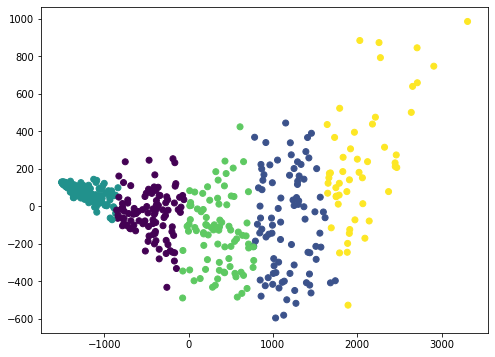

In [11]:
plt.figure(figsize=(8,6))
from sklearn.decomposition import PCA
pca = PCA(2)
plot_pca = pca.fit_transform(num_columns)
plt.scatter(x= plot_pca[:,0], y = plot_pca[:,1],c= labels)
plt.show() # we see that the labels have been clusteres

In [12]:
#Find player LeBron
LeBron = num_columns.loc[data['player']=='LeBron James',:] 
#Find player Kevin Durant
KD = num_columns.loc[data['player']=='Kevin Durant',:]
KD

,age,g,gs,mp,fg,fga,x3p,x3pa,x2p,x2pa,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
133,25,81,81,3122,849,1688,192,491,657,1197,703,805,58,540,598,445,103,59,285,174,2593,2013


In [13]:
LeBron_list = LeBron.values.tolist() # kmeans model needs a list value and hence we changed it to list.
Kevin_list = KD.values.tolist()

In [14]:
print(kmean_model.predict(LeBron_list)) 
print(kmean_model.predict(Kevin_list))
# we check on which clusters do LeBron and Kevin belong to

[4]
[4]


In [15]:
cluster_map = pd.DataFrame() # a new dataframe
cluster_map['player_name'] = data.player.values # get the vlaues of players and add them to the dataframe
cluster_map['cluster_no.'] = labels #we add the clusters column to display 
cluster_map[cluster_map['cluster_no.'] == 4] ##displays the player of each cluster input

,player_name,cluster_no.
3,Arron Afflalo,4
6,LaMarcus Aldridge,4
17,Carmelo Anthony,4
37,Nicolas Batum,4
41,Bradley Beal,4
59,Chris Bosh,4
85,Michael Carter-Williams,4
99,Mike Conley,4
101,DeMarcus Cousins,4
110,Stephen Curry,4


**Let us predict the values using Linear Regression**

In [16]:
from sklearn.decomposition import PCA
pca = PCA(2)
plot_columns = pca.fit_transform(num_columns)

In [17]:
data.drop(['pos','season','season_end','bref_team_id'],axis=1,inplace =True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   player  481 non-null    object 
 1   age     481 non-null    int64  
 2   g       481 non-null    int64  
 3   gs      481 non-null    int64  
 4   mp      481 non-null    int64  
 5   fg      481 non-null    int64  
 6   fga     481 non-null    int64  
 7   fg.     479 non-null    float64
 8   x3p     481 non-null    int64  
 9   x3pa    481 non-null    int64  
 10  x3p.    414 non-null    float64
 11  x2p     481 non-null    int64  
 12  x2pa    481 non-null    int64  
 13  x2p.    478 non-null    float64
 14  efg.    479 non-null    float64
 15  ft      481 non-null    int64  
 16  fta     481 non-null    int64  
 17  ft.     461 non-null    float64
 18  orb     481 non-null    int64  
 19  drb     481 non-null    int64  
 20  trb     481 non-null    int64  
 21  ast     481 non-null    int64  
 22  st

In [19]:
new = data[['player','fta','fga','x3pa','pts']]
new

,player,fta,fga,x3pa,pts
0,Quincy Acy,53,141,15,171
1,Steven Adams,136,185,0,265
2,Jeff Adrien,119,275,0,362
3,Arron Afflalo,336,1011,300,1330
4,Alexis Ajinca,67,249,1,328
...,...,...,...,...,...
476,Tony Wroten,326,808,188,939
477,Nick Young,285,889,350,1144
478,Thaddeus Young,229,1283,292,1417
479,Cody Zeller,200,404,1,490


In [21]:
new.describe().T

,count,mean,std,min,25%,50%,75%,max
fta,481.0,120.642412,131.240639,0.0,22.0,73.0,179.0,805.0
fga,481.0,424.463617,368.850833,0.0,110.0,332.0,672.0,1688.0
x3pa,481.0,110.130977,132.751732,0.0,3.0,48.0,193.0,615.0
pts,481.0,516.582121,470.422228,0.0,115.0,401.0,821.0,2593.0


In [22]:
dummies = pd.get_dummies(new.player)
dummies.head(3)

,A.J. Price,Aaron Brooks,Aaron Gray,Adonis Thomas,Al Harrington,Al Horford,Al Jefferson,Al-Farouq Aminu,Alan Anderson,Alec Burks,Alex Len,Alexey Shved,Alexis Ajinca,Allen Crabbe,Alonzo Gee,Amar'e Stoudemire,Amir Johnson,Anderson Varejao,Andray Blatche,Andre Drummond,Andre Iguodala,Andre Miller,Andre Roberson,Andrea Bargnani,Andrei Kirilenko,Andrew Bogut,Andrew Bynum,Andrew Nicholson,Andris Biedrins,Antawn Jamison,Anthony Bennett,Anthony Davis,Anthony Morrow,Anthony Randolph,Anthony Tolliver,Archie Goodwin,Arinze Onuaku,Arnett Moultrie,Aron Baynes,Arron Afflalo,...,Tim Hardaway,Timofey Mozgov,Tobias Harris,Toney Douglas,Tony Allen,Tony Mitchell,Tony Parker,Tony Snell,Tony Wroten,Tornike Shengelia,Toure' Murry,Travis Outlaw,Trevor Ariza,Trevor Booker,Trey Burke,Tristan Thompson,Troy Daniels,Ty Lawson,Tyler Hansbrough,Tyler Zeller,Tyreke Evans,Tyshawn Taylor,Tyson Chandler,Udonis Haslem,Vander Blue,Viacheslav Kravtsov,Victor Claver,Victor Oladipo,Vince Carter,Vitor Faverani,Wayne Ellington,Wesley Johnson,Wesley Matthews,Will Barton,Will Bynum,Willie Green,Wilson Chandler,Xavier Henry,Zach Randolph,Zaza Pachulia
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
data1 = pd.concat([dummies,new],axis = 1)

In [24]:
data1.drop(['player'],axis = 1,inplace =True)

In [25]:
X = data1.drop(['pts'],axis = 1)
y = data1['pts']

In [26]:
print(X.shape)
print(y.shape)

(481, 484)
(481,)


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 100)

In [28]:
y_test = y_test[:,np.newaxis]
y_train = y_train[:,np.newaxis]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [29]:
y_train.shape

(384, 1)

In [30]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
Lr.score(X_test,y_test)

0.9905932319277113

In [32]:
def predict_points(player,fta,fga,x3pa):    
    loc_index = np.where(X.columns==player)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = fta
    x[1] = fga
    x[2] = x3pa
    if loc_index >= 0:
        x[loc_index] = 1

    return round(Lr.predict([x])[0][0])

In [33]:
# the points LBJ would score if he took 1011 free throws, 136 field goals attempt and 300 3 pointer shots
predict_points('LeBron James',1011,136,300)

4288.0

In [36]:
# predict the points of Kevin Durant, if he took 1011 free throws, 136 field goals attempt and 300 3 pointer shots
predict_points('Kevin Durant',1011,136,300)

4242.0

In [37]:
# predict the points of Jeff Adrien, if he took 1011 free throws, 136 field goals attempt and 300 3 pointer shots
predict_points('Jeff Adrien',1011,136,300)

4048.0